In [ ]:
import pandas as pd
from google.cloud import storage
from io import BytesIO
from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [ ]:
bucket_name = 'my-bigdataproject-jg'
gs_path  = f'gs://{bucket_name}/'
landing_folder = 'landing/'
cleaned_folder = 'cleaned/'
destination_folder = 'code_and_models/'

storage_client = storage.Client() 
bucket = storage_client.get_bucket(bucket_name)



In [ ]:
data_years = [2023]
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

taxi_file_path = gs_path + landing_folder
taxi_file_list = [taxi_file_path + f'yellow_tripdata_{year}-{month}.parquet' for year in data_years for month in months]
taxi_df = pd.concat(map(pd.read_parquet, taxi_file_list))

taxi_df.head()
        

In [ ]:
# Show the number of records and columns but format the output to have a commas
print(f"Number of records: {taxi_df.shape[0]:,}")
print(f"Number of columns: {taxi_df.shape[1]}\n")

print(taxi_df.dtypes)

print("\n Missing values")
print(taxi_df.isnull().sum())

In [ ]:
# Data Range for tpep_pickup_datetime
print("\nDate Range for tpep_pickup_datetime")
print(f"Min: {taxi_df['tpep_pickup_datetime'].min()}")
print(f"Max: {taxi_df['tpep_pickup_datetime'].max()}")

# Data Range for tpep_dropoff_datetime
print("\nDate Range for tpep_dropoff_datetime")
print(f"Min: {taxi_df['tpep_dropoff_datetime'].min()}")
print(f"Max: {taxi_df['tpep_dropoff_datetime'].max()}")

In [ ]:
# Clean up the tppep_pickup_datetime and tpep_dropoff_datetime columns
# The min and max for both columns are within the range of 2021-01-01 to 2023-12-31
# Remove the records that are outside of this range
taxi_df = taxi_df[(taxi_df['tpep_pickup_datetime'] >= '2021-01-01') & (taxi_df['tpep_pickup_datetime'] <= '2023-12-31')]
taxi_df = taxi_df[(taxi_df['tpep_dropoff_datetime'] >= '2021-01-01') & (taxi_df['tpep_dropoff_datetime'] <= '2023-12-31')]

# Check the date range again
print("\nDate Range for tpep_pickup_datetime")
print(f"Min: {taxi_df['tpep_pickup_datetime'].min()}")
print(f"Max: {taxi_df['tpep_pickup_datetime'].max()}")

print("\nDate Range for tpep_dropoff_datetime")
print(f"Min: {taxi_df['tpep_dropoff_datetime'].min()}")
print(f"Max: {taxi_df['tpep_dropoff_datetime'].max()}")
print(f"Number of records: {taxi_df.shape[0]:,}")

In [ ]:
# Drop the passenger_count rows that are null
df = taxi_df.dropna(subset=['passenger_count'])

# Change the passenger_count column to a int
df['passenger_count'] = df['passenger_count'].astype(int)

In [75]:
def get_data(year, month):
    file_name = f'yellow_tripdata_{year}-{month}.parquet'
    file_path = f'{gs_path}{file_name}'
    df = pd.read_parquet(file_path, engine='fastparquet')
    return df

In [ ]:
def analyze_data(df):
    print(f"Number of records: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    #print(f"\nColumns: {df.columns}")
    print(df.info())
    #print(df.describe())

    print("\nMissing values:")
    print(df.isnull().sum())

    # Analyze specific columns

    # Data Range for tpep_pickup_datetime
    print("\nDate Range for tpep_pickup_datetime")
    print(f"Min: {df['tpep_pickup_datetime'].min()}")
    print(f"Max: {df['tpep_pickup_datetime'].max()}")

    # Data Range for tpep_dropoff_datetime
    print("\nDate Range for tpep_dropoff_datetime")
    print(f"Min: {df['tpep_dropoff_datetime'].min()}")
    print(f"Max: {df['tpep_dropoff_datetime'].max()}")

    # Min and Max of totalamount
    print("\nFare Amount range")
    print(f"Min: {df['total_amount'].min()}")
    print(f"Max: {df['total_amount'].max()}")



    # Trip Distance range
    print("\nTrip Distance Range (in miles)")
    print(f"Min: {df['trip_distance'].min()}")
    print(f"Max: {df['trip_distance'].max()}")
    print(f"Avg: {df['trip_distance'].mean()}")
    print(f"25 percentile: {df['trip_distance'].quantile(0.25)}")
    print(f"75 percentile: {df['trip_distance'].quantile(0.75)}")
    print(f"Median: {df['trip_distance'].median()}")

    # Passenger count range
    print("\nPassenger Count Range")
    print(f"Min: {df['passenger_count'].min()}")
    print(f"Max: {df['passenger_count'].max()}")
    print(f"Avg: {df['passenger_count'].mean()}")
    print(f"25 percentile: {df['passenger_count'].quantile(0.25)}")
    print(f"75 percentile: {df['passenger_count'].quantile(0.75)}")
    print(f"Median: {df['passenger_count'].median()}")

    # Print the number of trips with distance greater than 100,000 miles
    print("\nNumber of trips with distance greater than 100,000 miles")
    print(len(df[df['trip_distance'] > 100000]))

    # Graph showing the count of trips by day throughout the month
    df['day'] = df['tpep_pickup_datetime'].dt.day
    df['day'].hist()
    plt.title('Count of Trips by Day')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.show()

    # Box plot of trip distance
    df.boxplot(column='trip_distance')
    plt.title('Trip Distance')
    plt.show()
    






Analyzing data for 2023-12
Number of records: 3376567
Number of columns: 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376567 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           float64       
 8   DOLocationID           float64       
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64 

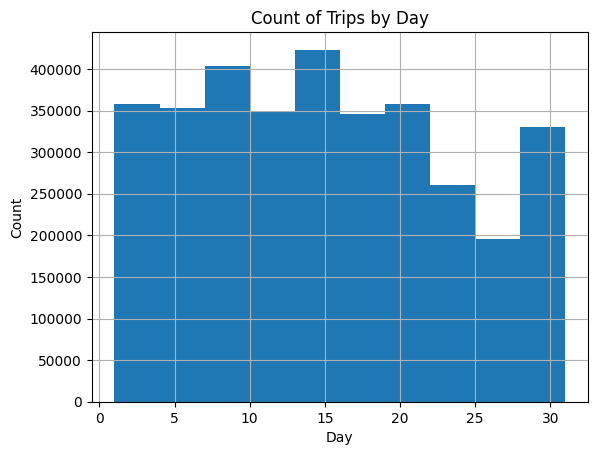

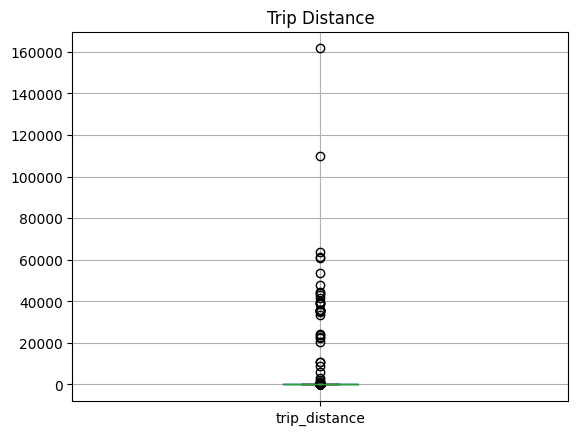

In [77]:
if __name__ == "__main__":
    print('Starting Analysis')
    for year in data_years:
        for month in months:
            print(f"\nAnalyzing data for {year}-{month}")
            df = get_data(year, month)
            analyze_data(df)
    print("Analysis Complete")
